In [260]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [261]:
def figure_for_scatter():
    f = plt.figure(figsize=(10, 8))

In [262]:
column_names = ["sen", "rec", "ret", "cir", "top","tok","mess","rush","sil","s_m","s_n","er", "nans"]
path_to_meta = "D:\\Git\\TokenRing\\research\\results.txt"

In [263]:
data = pd.read_table(path_to_meta, sep=' ', names=column_names)
data = data.drop(data.index[0])
data = data.drop("nans", axis=1)
data["sen"].apply(pd.to_numeric, errors='coerce')
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,239624.0,243193.0,246317.0,4909.0,2,1,10000,true,true,10,10,false
2,267290.0,271752.0,275322.0,4909.0,2,1,10000,true,true,10,10,true
3,2744294.5,2786909.0,2821492.0,63364.0,3,1,10000,true,true,10,10,true
4,21680820.0,21787022.0,21884523.0,179383.0,4,1,10000,true,true,10,10,false
5,5172214.0,5265029.0,5335757.0,140562.0,4,1,10000,true,true,10,10,true


In [264]:
cols_numeric = ["sen", "rec", "ret", "cir", "top","tok","mess","s_m","s_n"]
data[cols_numeric] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [265]:
d = {'true': True, 'false': False}

In [266]:
for col in ["rush","sil", "er"]:
    data[col] = data[col].map(d)
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,239624.0,243193.0,246317.0,4909.0,2.0,1.0,10000.0,True,True,10.0,10.0,False
2,267290.0,271752.0,275322.0,4909.0,2.0,1.0,10000.0,True,True,10.0,10.0,True
3,2744294.5,2786909.0,2821492.0,63364.0,3.0,1.0,10000.0,True,True,10.0,10.0,True
4,21680820.0,21787022.0,21884523.0,179383.0,4.0,1.0,10000.0,True,True,10.0,10.0,False
5,5172214.0,5265029.0,5335757.0,140562.0,4.0,1.0,10000.0,True,True,10.0,10.0,True


In [267]:
rush_early = data.loc[np.logical_and(data.er == 1, data.rush == 1)]
rush_early.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
2,267290.0,271752.0,275322.0,4909.0,2.0,1.0,10000.0,True,True,10.0,10.0,True
3,2744294.5,2786909.0,2821492.0,63364.0,3.0,1.0,10000.0,True,True,10.0,10.0,True
5,5172214.0,5265029.0,5335757.0,140562.0,4.0,1.0,10000.0,True,True,10.0,10.0,True
6,10158575.0,10345768.0,10493022.0,290047.0,5.0,1.0,10000.0,True,True,10.0,10.0,True
9,13721473.5,13950387.5,14147620.0,411421.0,6.0,1.0,10000.0,True,True,10.0,10.0,True


[]

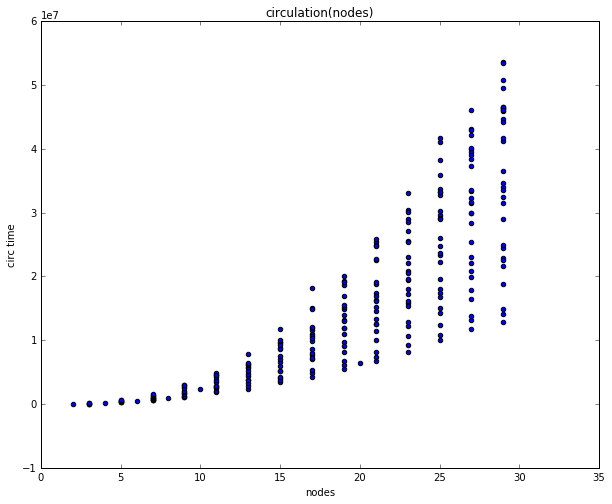

In [268]:
figure_for_scatter()
plt.title("circulation(nodes)")
plt.ylabel("circ time")
plt.xlabel("nodes")
plt.scatter(rush_early["top"], rush_early["cir"])
plt.plot()

In [272]:
rush_noearly = rush_early = data.loc[np.logical_and(data.er == 0, data.rush == 1)]
rush_noearly.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,239624.0,243193.0,246317.0,4909.0,2.0,1.0,10000.0,True,True,10.0,10.0,False
4,21680820.0,21787022.0,21884523.0,179383.0,4.0,1.0,10000.0,True,True,10.0,10.0,False
7,29472832.0,29595545.0,29716026.0,212404.0,5.0,1.0,10000.0,True,True,10.0,10.0,False
8,6953998.0,6997282.0,7036104.0,73181.0,3.0,1.0,10000.0,True,True,10.0,10.0,False
11,54711865.0,54890801.0,55103875.0,358989.5,6.0,1.0,10000.0,True,True,10.0,10.0,False


[]

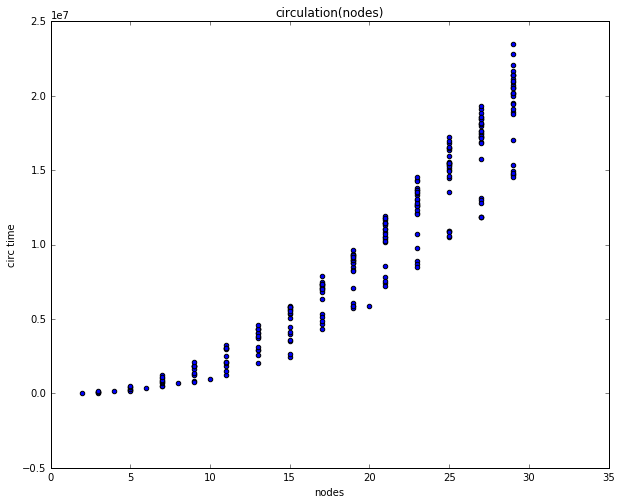

In [270]:
figure_for_scatter()
plt.title("circulation(nodes)")
plt.ylabel("circ time")
plt.xlabel("nodes")
plt.scatter(rush_noearly["top"], rush_noearly["cir"])
plt.plot()

In [271]:
data.to_csv("data_hw2.csv", index= True, sep=" ", encoding= "utf_8")